## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

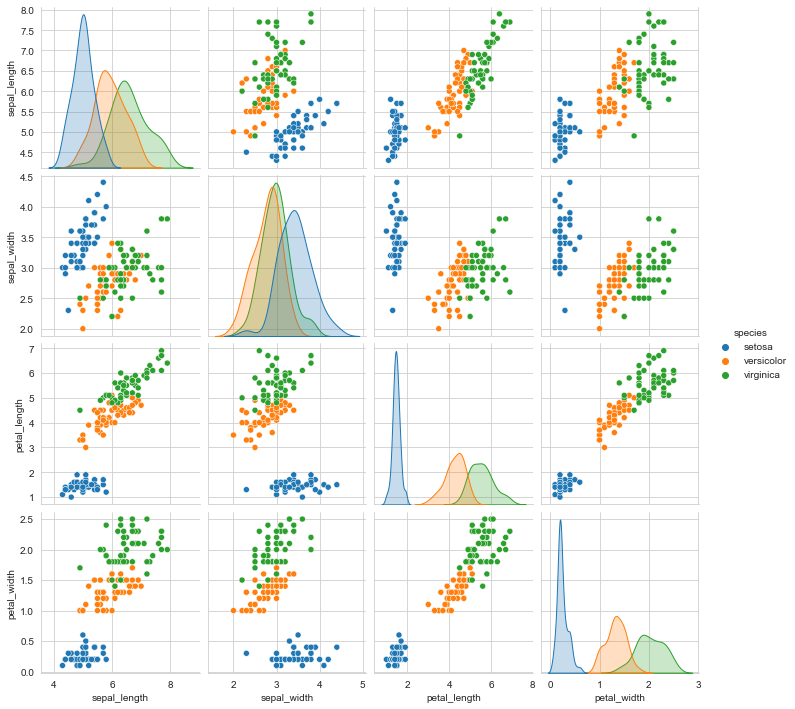

In [13]:
sns.pairplot(data,hue='species')

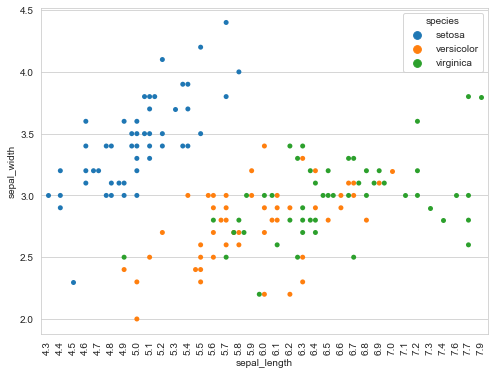

In [21]:
plt.figure(figsize=(8,6))
sns.swarmplot(data['sepal_length'],data['sepal_width'],hue=data['species'])
plt.xticks(rotation=90)
plt.show()

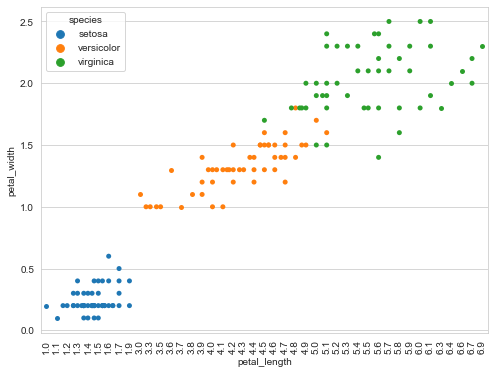

In [39]:
plt.figure(figsize=(8,6))
sns.swarmplot(data['petal_length'],data['petal_width'],hue=data['species'])
plt.xticks(rotation=90)
plt.show()

<Figure size 576x432 with 0 Axes>

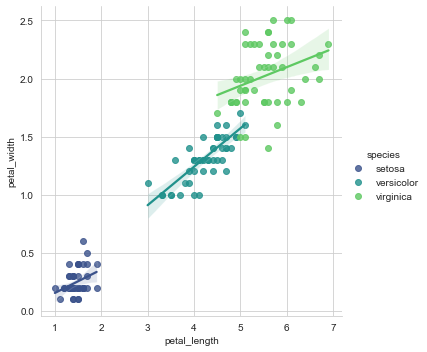

In [44]:
plt.figure(figsize=(8,6))
sns.lmplot(data=data,x='petal_length',y='petal_width',hue='species',palette='viridis')
plt.show()

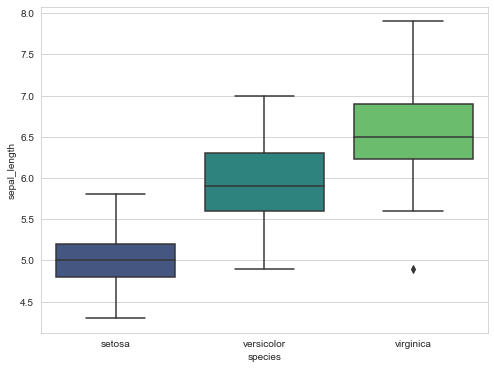

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,y='sepal_length',x='species',palette='viridis')
plt.show()

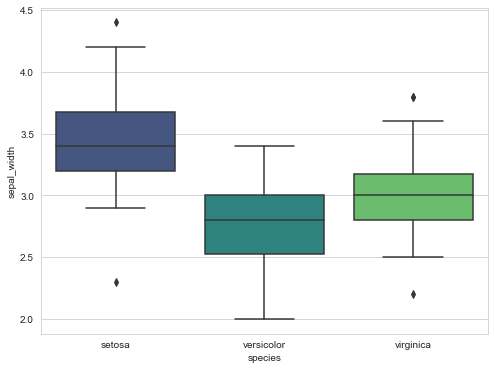

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,y='sepal_width',x='species',palette='viridis')
plt.show()

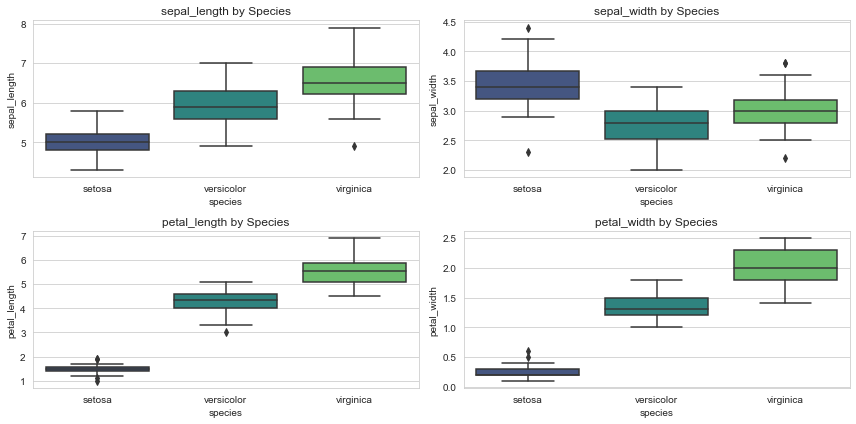

In [53]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="species", y=feature, data=data,palette='viridis')
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

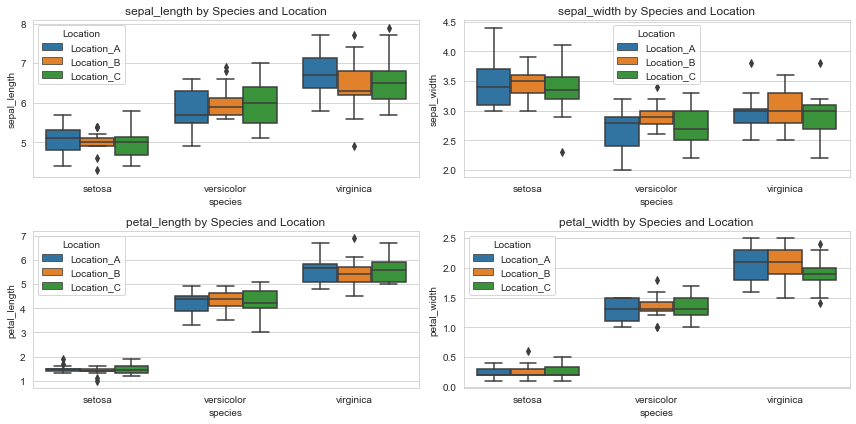

In [5]:
data["location"] = ["Location_A", "Location_B", "Location_C"] * 50
plt.figure(figsize=(12, 6))
for i, feature in enumerate(data.columns[:-2]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="species", y=feature, hue="location", data=data)
    plt.title(f"{feature} by Species and Location")
    plt.legend(title="Location")
plt.tight_layout()
plt.show()

In [74]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,location
0,5.1,3.5,1.4,0.2,setosa,Location_A
1,4.9,3.0,1.4,0.2,setosa,Location_B
2,4.7,3.2,1.3,0.2,setosa,Location_C
3,4.6,3.1,1.5,0.2,setosa,Location_A
4,5.0,3.6,1.4,0.2,setosa,Location_B
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Location_B
146,6.3,2.5,5.0,1.9,virginica,Location_C
147,6.5,3.0,5.2,2.0,virginica,Location_A
148,6.2,3.4,5.4,2.3,virginica,Location_B


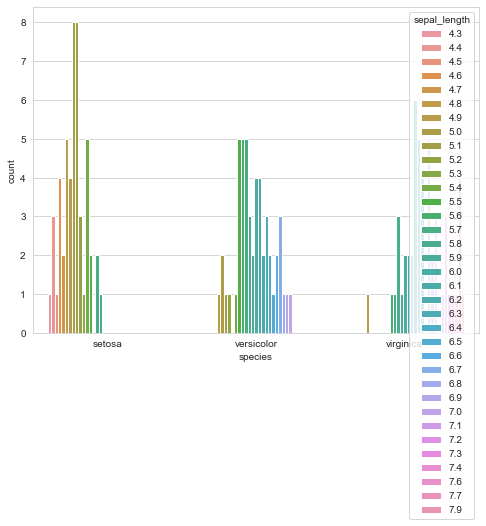

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(data['species'],hue=data['sepal_length'])
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

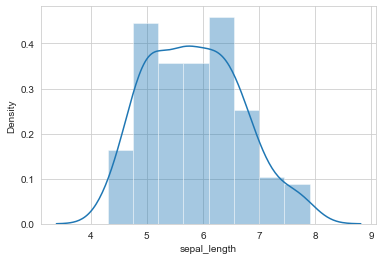

In [63]:
sns.distplot(data['sepal_length'])

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

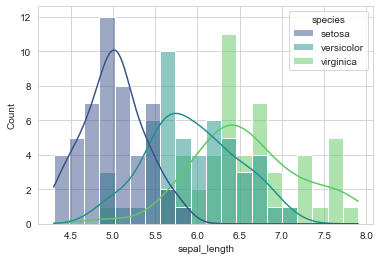

In [70]:
sns.histplot(data=data,x='sepal_length',hue='species',kde=True,bins=20,palette='viridis')

In [77]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,location
0,5.1,3.5,1.4,0.2,setosa,Location_A
1,4.9,3.0,1.4,0.2,setosa,Location_B
2,4.7,3.2,1.3,0.2,setosa,Location_C
3,4.6,3.1,1.5,0.2,setosa,Location_A
4,5.0,3.6,1.4,0.2,setosa,Location_B


In [87]:
from sklearn.datasets import load_iris
df=load_iris()
iris=pd.DataFrame(df.data,columns=df.feature_names)
iris['species']=pd.Categorical.from_codes(df.target,df.target_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
X=data.drop(['species','location'],axis=1)
y=data['species']

## Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

## Model Selection

In [8]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1,random_state=42,criterion='gini')

## Training

In [9]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1, random_state=42)

## Evaluation

In [10]:
y_pred=model.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

1.0

In [12]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
accuracy_rate=[]
for i in range(1,50):
    model=RandomForestClassifier(n_estimators=i,random_state=42)
    model.fit(X_train,y_train)
    pred_i=model.predict(X_test)
    accuracy_rate.append(np.mean(pred_i==y_test))

In [16]:
accuracy_rate

[1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777

<AxesSubplot:>

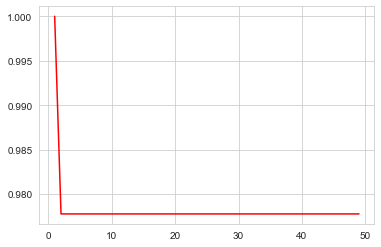

In [170]:
sns.lineplot(range(1,50),y=accuracy_rate,color='r',markers='o', markersize=5, markerfacecolor='red')